# PwC Challenge Data Scientist Jr

## Table of Contents
- [Exploration](#Exploration)
- [Data Cleaning](#Data-Cleaning)
    1. [Duplicates](#Duplicates)
    1. [NaNs](#NaNs)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Modeling](#Modeling)
- [Conclusion](#Conclusion)

<hr id="Exploration"></hr>

<h1>Exploration</h1>

In [81]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
descriptions_df = pd.read_csv("data/descriptions.csv")
people_df = pd.read_csv("data/people.csv")
salary_df = pd.read_csv("data/salary.csv")


In [83]:
descriptions_df.head(10)

,id,Description
0,0,I am a 32-year-old male working as a Software ...
1,1,I am a 28-year-old data analyst with a Master'...
2,2,I am a 45-year-old Senior Manager with a PhD a...
3,3,I am a 36-year-old female Sales Associate with...
4,4,I am a 52-year-old male with over two decades ...
5,5,I am a 29-year-old Marketing Analyst with a Ba...
6,6,I am a 42-year-old female with a Master's degr...
7,7,I am a 31-year-old Sales Manager with a Bachel...
8,8,I am a 26-year-old female Marketing Coordinato...
9,9,I am a 38-year-old Senior Scientist with a PhD...


In [84]:
people_df.head(10)

,id,Age,Gender,Education Level,Job Title,Years of Experience
0,0,32.0,Male,Bachelor's,Software Engineer,5.0
1,1,28.0,Female,Master's,Data Analyst,3.0
2,2,45.0,Male,PhD,Senior Manager,15.0
3,3,36.0,Female,Bachelor's,Sales Associate,7.0
4,4,52.0,Male,Master's,Director,20.0
5,5,29.0,Male,Bachelor's,Marketing Analyst,2.0
6,6,42.0,Female,Master's,Product Manager,12.0
7,7,31.0,Male,Bachelor's,Sales Manager,4.0
8,8,26.0,Female,Bachelor's,Marketing Coordinator,1.0
9,9,38.0,Male,PhD,Senior Scientist,10.0


In [85]:
salary_df.head(10)

,id,Salary
0,0,90000.0
1,1,65000.0
2,2,150000.0
3,3,60000.0
4,4,200000.0
5,5,55000.0
6,6,120000.0
7,7,80000.0
8,8,45000.0
9,9,110000.0


In [86]:
print(descriptions_df.shape)
print(descriptions_df.isnull().sum())


(375, 2)
id             0
Description    3
dtype: int64


In [87]:
print(people_df.shape)
print(people_df.isnull().sum())

(375, 6)
id                     0
Age                    5
Gender                 5
Education Level        5
Job Title              5
Years of Experience    2
dtype: int64


In [88]:
print(salary_df.shape)
print(salary_df.isnull().sum())

(375, 2)
id        0
Salary    2
dtype: int64


<hr id="Data-Cleaning"></hr>

<h1>Data Cleaning</h1>

<div id="Duplicates">
    <h3>1- Duplicates</h3>
    <p>Let's check duplicates</p>
</div>

In [89]:
duplicate_people = people_df.duplicated(subset=people_df.columns.difference(["id"]))
num_duplicates = duplicate_people.sum()
print(f"Number of persons duplicated: {num_duplicates}")

Number of persons duplicated: 49


In [90]:
duplicates_desc = descriptions_df.duplicated(subset=descriptions_df.columns.difference(["id"]))
num_duplicates = duplicates_desc.sum()
print(f"Number of descriptions duplicated: {num_duplicates}")



Number of descriptions duplicated: 2


In [91]:
print("Detected as duplicated: ")
print(descriptions_df[duplicates_desc])

print("Detected as NaN: ")
print(descriptions_df[descriptions_df['Description'].isnull()])

Detected as duplicated: 
      id Description
125  125         NaN
177  177         NaN
Detected as NaN: 
      id Description
111  111         NaN
125  125         NaN
177  177         NaN


In [93]:
ids_with_nulls = descriptions_df[descriptions_df['Description'].isnull()]["id"].tolist()
print(f"IDs with NaN values: {ids_with_nulls}")

IDs with NaN values: [111, 125, 177]


In [94]:
for index, row in descriptions_df[descriptions_df['Description'].isnull()].iterrows():
    person_id = row['id']
    person_info = people_df.loc[people_df["id"] == person_id].values[0]
    
    description = f"Age: {person_info[1]}, Gender: {person_info[2]}, Education: {person_info[3]}, Job Title: {person_info[4]}, Experience: {person_info[5]} years"
    descriptions_df.loc[descriptions_df["id"] == person_id, "Description"] = description

# Let's check the new descriptions
print(descriptions_df[descriptions_df["id"].isin([111, 125, 177])])

      id                                        Description
111  111  Age: 37.0, Gender: Male, Education: Bachelor's...
125  125  Age: 26.0, Gender: Male, Education: Bachelor's...
177  177  Age: 31.0, Gender: Male, Education: Bachelor's...


In [95]:
#Lets check the duplicates again
duplicates_desc = descriptions_df.duplicated(subset=descriptions_df.columns.difference(["id"]))
num_duplicates = duplicates_desc.sum()
print(num_duplicados)

0


<div id="NaNs">
    <h3>2- NaNs</h3>
    <p>Age NaNs</p>
</div>

In [12]:
people_df[people_df['Age'].isnull()]


,id,Age,Gender,Education Level,Job Title,Years of Experience
172,172,NaN,NaN,NaN,NaN,NaN
221,221,NaN,Female,Bachelor's,Junior Social Media Specialist,3.0
260,260,NaN,NaN,NaN,NaN,NaN
287,287,NaN,Female,Bachelor's,Senior Marketing Analyst,8.0
315,315,NaN,Male,Bachelor's,Senior Software Engineer,13.0


In [ ]:
description_172 = descriptions_df.loc[descriptions_df["id"] == 172, "Description"].values[0]
description_260 = descriptions_df.loc[descriptions_df["id"] == 260, "Description"].values[0]
print(description_172)
print(description_260)

As an employee, I bring a wealth of diverse experiences and a commitment to excellence in my professional endeavors. My journey has been shaped by a variety of roles and responsibilities, each contributing to my growth and expertise. I am dedicated to continuous learning and development, always seeking opportunities to enhance my skills and knowledge. My approach to work is characterized by a strong work ethic, attention to detail, and a passion for achieving results. I believe in the power of collaboration and communication, and I am always eager to contribute to a positive and productive work environment.
As an employee, I bring a unique blend of skills and experiences to the table. My journey has equipped me with a diverse set of abilities and a deep understanding of my field. I am committed to continuous learning and professional growth, always striving to stay updated with the latest trends and advancements. My approach to work is characterized by dedication, attention to detail, 

In row 172 and 260, the description does not provide important data to fill in the missing data, so we decided to delete them.

In [ ]:
ids_to_delete = [172, 260]

people_df = people_df[~people_df["id"].isin(ids_to_delete)]
descriptions_df = descriptions_df[~descriptions_df["id"].isin(ids_to_delete)]
salary_df = salary_df[~salary_df["id"].isin(ids_to_delete)]


In [14]:
mean_age = people_df[(people_df["Years of Experience"] == 3) & (people_df["Education Level"] == "Bachelor's")]["Age"].mean()
print(int(mean_age))

people_df["Age"] = people_df["Age"].fillna(30)
print(people_df["Age"].isna().sum())  

30
0


Genders NaNs

In [15]:
print(people_df.isnull().sum())

id                     0
Age                    0
Gender                 3
Education Level        3
Job Title              3
Years of Experience    0
dtype: int64


In [16]:
print(people_df[people_df['Gender'].isnull()])

description_219 = descriptions_df.loc[descriptions_df["id"] == 219, "Description"].values[0]
description_225 = descriptions_df.loc[descriptions_df["id"] == 225, "Description"].values[0]
description_235 = descriptions_df.loc[descriptions_df["id"] == 235, "Description"].values[0]
print(description_219)
print(description_225)
print(description_235)



nan_indices = people_df[people_df["Gender"].isna()].index
people_df.loc[nan_indices, "Gender"] = np.random.choice(["Male", "Female"], size=len(nan_indices))

print(people_df["Gender"].isna().sum())  

      id   Age Gender Education Level                    Job Title  \
219  219  40.0    NaN      Bachelor's  Senior Sales Representative   
225  225  40.0    NaN      Bachelor's     Senior Marketing Manager   
235  235  32.0    NaN      Bachelor's  Junior Sales Representative   

     Years of Experience  
219                 12.0  
225                 11.0  
235                  3.0  
I am a 40-year-old Senior Sales Representative with a Bachelor's degree and 12 years of experience in the sales industry. I specialize in building strong client relationships, identifying market opportunities, and driving revenue growth. My extensive background has equipped me with a deep understanding of sales strategies and customer needs. In my current role, I manage a diverse portfolio of clients, develop and implement sales plans, and mentor junior team members. I am dedicated, results-oriented, and committed to continuous learning and professional development to stay current with industry trends an

Education NaNs

In [17]:

print(people_df[people_df['Education Level'].isnull()])

description_139 = descriptions_df.loc[descriptions_df["id"] == 139, "Description"].values[0]
description_261 = descriptions_df.loc[descriptions_df["id"] == 261, "Description"].values[0]
description_366 = descriptions_df.loc[descriptions_df["id"] == 366, "Description"].values[0]
print(description_139)
print(description_261)
print(description_366)

people_df.loc[people_df["id"] == 139, "Education Level"] = "Master's"
people_df.loc[people_df["id"] == 261, "Education Level"] = "Bachelor's"
people_df.loc[people_df["id"] == 366, "Education Level"] = "Bachelor's"

people_df['Education Level'].isnull().sum()

      id   Age  Gender Education Level                         Job Title  \
139  139  43.0  Female             NaN  Senior Product Marketing Manager   
261  261  37.0  Female             NaN          Senior Financial Manager   
366  366  31.0  Female             NaN          Junior Financial Analyst   

     Years of Experience  
139                 14.0  
261                 10.0  
366                  3.0  
I am a 43-year-old Senior Product Marketing Manager with a Master's degree and 14 years of experience. I specialize in developing and executing marketing strategies that drive product success and customer engagement. My role involves collaborating with product development, sales, and creative teams to ensure our products exceed market expectations. I excel at translating complex technical features into clear, customer-centric messaging. My career has equipped me with a deep understanding of both strategic and tactical aspects of product marketing. I am passionate about mentoring j

np.int64(0)

Job Title NaNs

In [18]:
print(people_df[people_df['Job Title'].isnull()])
description_51 = descriptions_df.loc[descriptions_df["id"] == 51, "Description"].values[0]
description_60 = descriptions_df.loc[descriptions_df["id"] == 60, "Description"].values[0]
description_332 = descriptions_df.loc[descriptions_df["id"] == 332, "Description"].values[0]
print(description_51)
print(description_60)
print(description_332)

people_df.loc[people_df["id"] == 51, "Job Title"] = "Business Intelligence Analyst"
people_df.loc[people_df["id"] == 60, "Job Title"] = "Director of Operations"
people_df.loc[people_df["id"] == 332, "Job Title"] = "Senior UX Designer"

people_df['Job Title'].isnull().sum()

      id   Age  Gender Education Level Job Title  Years of Experience
51    51  33.0    Male        Master's       NaN                  7.0
60    60  51.0  Female        Master's       NaN                 23.0
332  332  45.0  Female             PhD       NaN                 16.0
I am a 33-year-old Business Intelligence Analyst with a Master's degree and seven years of experience in the field. My expertise lies in turning data into actionable insights to drive strategic decision-making. I am proficient in various BI tools and technologies, including SQL, Tableau, and Power BI. My role involves analyzing complex datasets, identifying trends, and providing key stakeholders with the information they need to make informed business decisions. I am committed to continuous learning and staying updated with the latest industry trends and advancements, leveraging my skills to contribute to the success of my organization.
I am a 51-year-old female with a Master's degree, currently serving as the 

np.int64(0)

### Checking NaNs

In [19]:
people_df.isnull().sum()

id                     0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
dtype: int64

In [20]:
descriptions_df.isnull().sum()

id             0
Description    0
dtype: int64

In [21]:
salary_df.isnull().sum()

id        0
Salary    0
dtype: int64

In [22]:
print("--- SALARY DF ---")
salary_df.info()
print("\n--- PEOPLE DF ---")
people_df['Age'] = people_df['Age'].astype('int64')
people_df.info()

--- SALARY DF ---
<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 374
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      373 non-null    int64  
 1   Salary  373 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.7 KB

--- PEOPLE DF ---
<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   373 non-null    int64  
 1   Age                  373 non-null    int64  
 2   Gender               373 non-null    object 
 3   Education Level      373 non-null    object 
 4   Job Title            373 non-null    object 
 5   Years of Experience  373 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 28.5+ KB


In [23]:
merged_df = pd.merge(people_df,salary_df, on="id", how="inner")
#merged_df.to_csv("DataTransformed.csv", index=False)

In [24]:
merged_df.head(10)

,id,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,0,32,Male,Bachelor's,Software Engineer,5.0,90000.0
1,1,28,Female,Master's,Data Analyst,3.0,65000.0
2,2,45,Male,PhD,Senior Manager,15.0,150000.0
3,3,36,Female,Bachelor's,Sales Associate,7.0,60000.0
4,4,52,Male,Master's,Director,20.0,200000.0
5,5,29,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,6,42,Female,Master's,Product Manager,12.0,120000.0
7,7,31,Male,Bachelor's,Sales Manager,4.0,80000.0
8,8,26,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,9,38,Male,PhD,Senior Scientist,10.0,110000.0


## Visualización

In [25]:
merged_df.describe()

,id,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000,373.000000
mean,186.844504,37.378016,10.030831,100577.345845
std,108.619601,7.083166,6.557007,48240.013482
min,0.000000,23.000000,0.000000,350.000000
25%,93.000000,31.000000,4.000000,55000.000000
50%,187.000000,36.000000,9.000000,95000.000000
75%,281.000000,44.000000,15.000000,140000.000000
max,374.000000,53.000000,25.000000,250000.000000


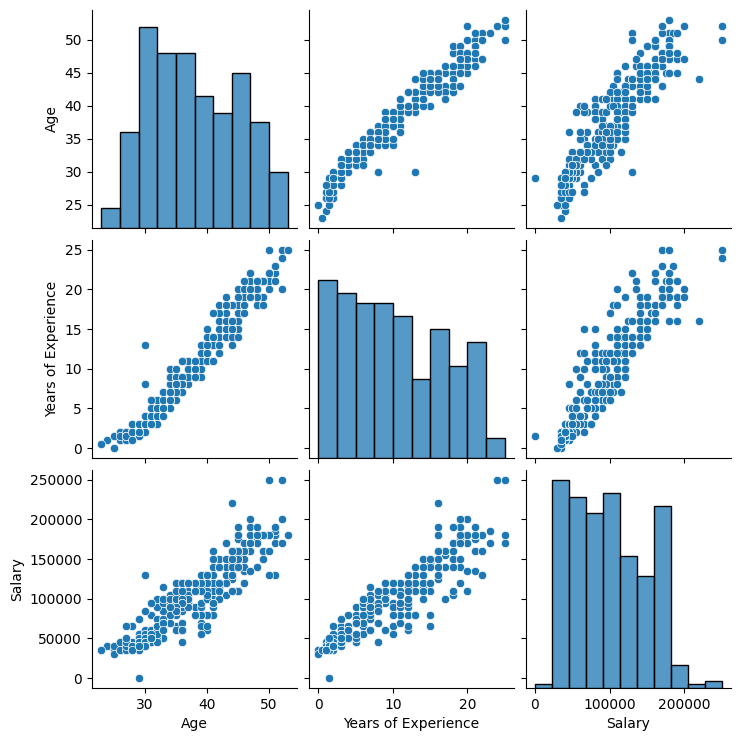

In [26]:
numerical_data = merged_df[['Age', 'Years of Experience', 'Salary']]

sns.pairplot(numerical_data)
plt.show()

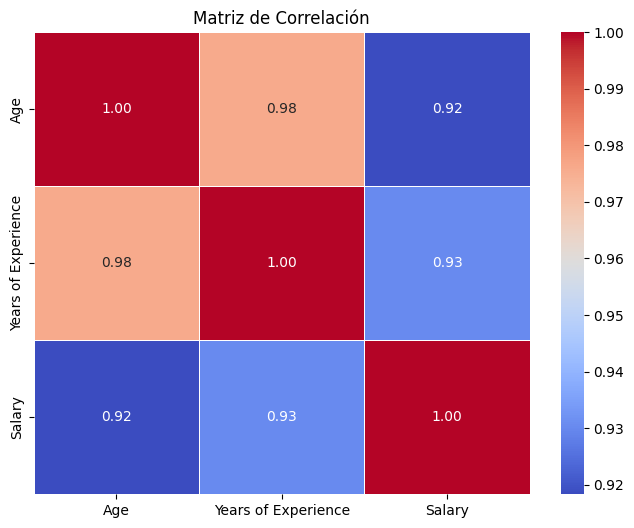

In [216]:
corr_matrix = numerical_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

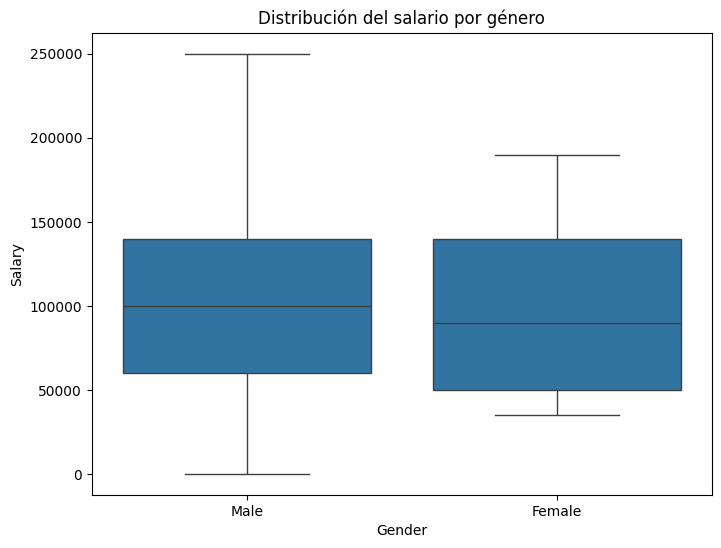

In [217]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Salary', data=merged_df)
plt.title('Distribución del salario por género')
plt.show()

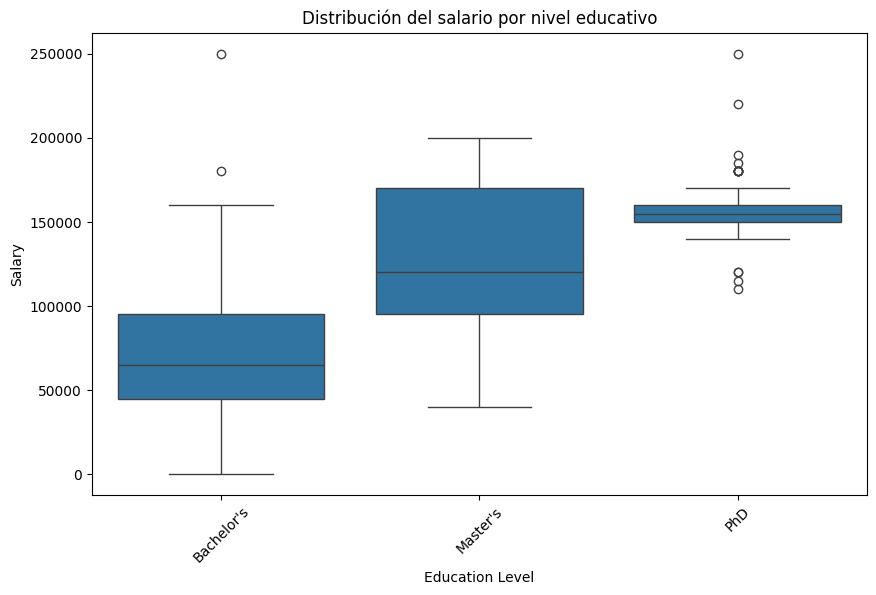

In [218]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education Level', y='Salary', data=merged_df)
plt.title('Distribución del salario por nivel educativo')
plt.xticks(rotation=45)
plt.show()

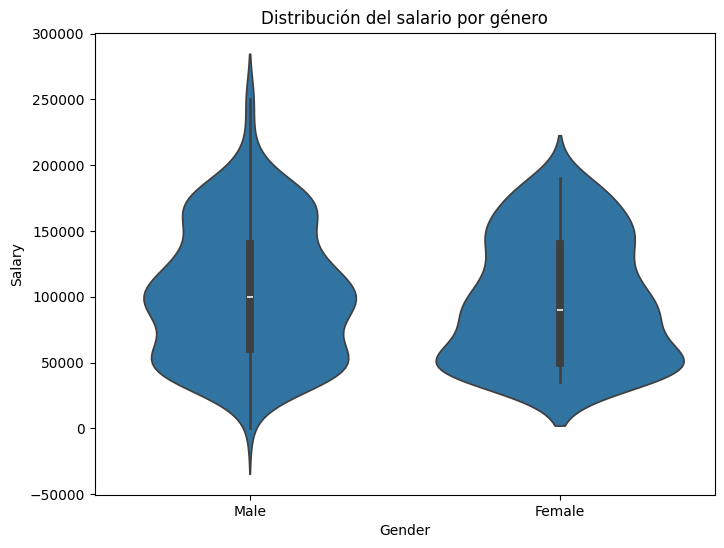

In [219]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='Salary', data=merged_df)
plt.title('Distribución del salario por género')
plt.show()

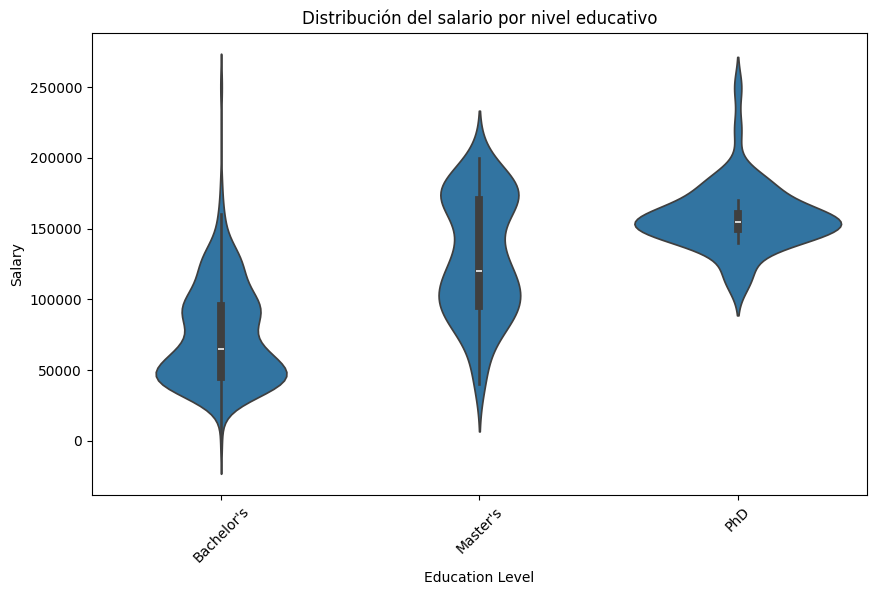

In [220]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Education Level', y='Salary', data=merged_df)
plt.title('Distribución del salario por nivel educativo')
plt.xticks(rotation=45)
plt.show()